In [27]:
from GrTiPy import *
init_printing()

In [28]:
d=5
t, r, theta, phi, psi= symbols('t r theta phi psi')
u = np.array([t, r, theta, phi, psi])
k = symbols('k')
a = Function('a')(t)

In [29]:
g00 =   1
g11 =  -a**2/(1-k*r**2)
g22 =  -a**2*r**2
g33 =  -a**2*r**2*sin(theta)**2
g44 =  -a**2*(1-k*r**2)

In [30]:
g=np.array([[g00,0,0,0,0],[0,g11,0,0,0],\
            [0,0,g22,0,0],[0,0,0,g33,0],[0,0,0,0,g44]])
gin=inverse_metric(g)

In [31]:
g

array([[1, 0, 0, 0, 0],
       [0, -a(t)**2/(-k*r**2 + 1), 0, 0, 0],
       [0, 0, -r**2*a(t)**2, 0, 0],
       [0, 0, 0, -r**2*a(t)**2*sin(theta)**2, 0],
       [0, 0, 0, 0, -(-k*r**2 + 1)*a(t)**2]], dtype=object)

In [32]:
gin

array([[1, 0, 0, 0, 0],
       [0, (k*r**2 - 1)/a(t)**2, 0, 0, 0],
       [0, 0, -1/(r**2*a(t)**2), 0, 0],
       [0, 0, 0, -1/(r**2*a(t)**2*sin(theta)**2), 0],
       [0, 0, 0, 0, 1/((k*r**2 - 1)*a(t)**2)]], dtype=object)

In [33]:
for i in range(d):
    for j in range(d):
        for k in range(d):
            if Christoffel_n_ab(d,u,g,gin,i,j,k) !=0:
                print("G(", u[i] ,u[j],u[k], ")="\
                , simplify(Christoffel_n_ab(d,u,g,gin,i,j,k)))

G( t r r )= -a(t)*Derivative(a(t), t)/(k*r**2 - 1)
G( t theta theta )= r**2*a(t)*Derivative(a(t), t)
G( t phi phi )= r**2*a(t)*sin(theta)**2*Derivative(a(t), t)
G( t psi psi )= (-k*r**2 + 1)*a(t)*Derivative(a(t), t)
G( r t r )= Derivative(a(t), t)/a(t)
G( r r t )= Derivative(a(t), t)/a(t)
G( r r r )= -k*r/(k*r**2 - 1)
G( r theta theta )= k*r**3 - r
G( r phi phi )= r*(k*r**2 - 1)*sin(theta)**2
G( r psi psi )= k*r*(-k*r**2 + 1)
G( theta t theta )= Derivative(a(t), t)/a(t)
G( theta r theta )= 1/r
G( theta theta t )= Derivative(a(t), t)/a(t)
G( theta theta r )= 1/r
G( theta phi phi )= -sin(2*theta)/2
G( phi t phi )= Derivative(a(t), t)/a(t)
G( phi r phi )= 1/r
G( phi theta phi )= 1/tan(theta)
G( phi phi t )= Derivative(a(t), t)/a(t)
G( phi phi r )= 1/r
G( phi phi theta )= 1/tan(theta)
G( psi t psi )= Derivative(a(t), t)/a(t)
G( psi r psi )= k*r/(k*r**2 - 1)
G( psi psi t )= Derivative(a(t), t)/a(t)
G( psi psi r )= k*r/(k*r**2 - 1)


In [34]:
def R(d,u,g,gin,a,b):
    sum=0.0
    for i in range(d):
        sum=sum+gin[a][i]*Ricci_Tensor_ab(d,u,g,gin,i,b)
    return sum

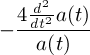

In [35]:
simplify(R(d,u,g,gin,0,0))

In [36]:
def G(d,u,g,gin,a,b):
    SumG=0.0
    for i in range(d):
        SumG=SumG+gin[a][i]*\
        Einstein_Equation_ab(d,u,g,gin,i,b)
    return SumG

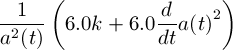

In [37]:
simplify(G(d,u,g,gin,0,0))

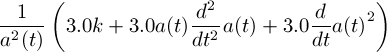

In [38]:
simplify(G(d,u,g,gin,1,1))

In [39]:
T=np.array([[0,0,0,0,0],[0,0,0,0,0],\
            [0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])

In [48]:
phi = Function('phi')(t)

In [41]:
def Scalar_Brans_Dicke_field_Equation(d,x,g,ginverse,psi,T):
    lamda, omaga, pi=symbols('lamda omaga pi')
    pro=1
    for i in range(d):
        pro=-pro*g[i][i]
    sum=0
    for k in range(d):
        for i in range(d):
            sum=sum+(1/sqrt(pro))*(diff((sqrt(pro)*ginverse[k][i]*diff(psi,x[i])),x[k]))
    Lap=expand(sum)-(8*pi)/(3+2*omaga)*Tr(T)+2*lamda*psi/(3+2*omaga)
    return Lap

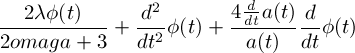

In [46]:
Scalar_Brans_Dicke_field_Equation(d,u,g,gin,phi,T)

In [75]:
Brans_Dicke_Equations(d,u,g,gin,phi,T)

Brans_Dicke[ 0 , 0 ]= Derivative(phi(t), t)**2 - 4*Derivative(a(t), t)*Derivative(phi(t), t)/(a(t)*phi(t))
Brans_Dicke[ 1 , 1 ]= (a(t)*phi(t)*Derivative(phi(t), t)**2 - a(t)*Derivative(phi(t), t, t) - 4*Derivative(a(t), t)*Derivative(phi(t), t))*a(t)/((k*r**2 - 1)*phi(t))
Brans_Dicke[ 2 , 2 ]= r**2*(-a(t)*phi(t)*Derivative(phi(t), t)**2 + a(t)*Derivative(phi(t), t, t) + 4*Derivative(a(t), t)*Derivative(phi(t), t))*a(t)/phi(t)
Brans_Dicke[ 3 , 3 ]= r**2*(-a(t)*phi(t)*Derivative(phi(t), t)**2 + a(t)*Derivative(phi(t), t, t) + 4*Derivative(a(t), t)*Derivative(phi(t), t))*a(t)*sin(theta)**2/phi(t)
Brans_Dicke[ 4 , 4 ]= (k*r**2 - 1)*(a(t)*phi(t)*Derivative(phi(t), t)**2 - a(t)*Derivative(phi(t), t, t) - 4*Derivative(a(t), t)*Derivative(phi(t), t))*a(t)/phi(t)
